# Implementation of GradientTape on auto mpg data
I thought it would be a good experiment to see if I can build a model implementing tf GradientTape on the auto mpg data set from assignment 1.
I was able to create a model that can estimate appproximate MPG based on 
weight and displacement( cylinder). I started with creating two separate models for MPG vs weight and MPG vs displacement to explore the dependencies. When I got those models working, I combined them together. I used the auto-mpg.data with header or column name. 

# MPG vs Weight and Displacement model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

dfauto = pd.read_csv('auto-mpg.csv', delim_whitespace=True, header=0)

dfauto.head
#dfauto.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin','Model']
dfauto.describe()

# create train and test dataset. 350 randomly selected rows for train and the rest for test
# transform feature Displacement and Weight into smaller single digit number 

dfauto['random'] = np.random.choice(range(398), 398, replace=False)
traindf = dfauto.loc[ dfauto['random'] < 350]
testdf = dfauto.loc[ dfauto['random'] >= 350]


dfauto1 = traindf['Displacement'].div(100)
dfauto2 = traindf['Weight'].apply(lambda x: x/1000)
dfauto3 = pd.concat([dfauto1, dfauto2], axis=1)

inputs_train = tf.constant( dfauto3, shape=(350,2), dtype=tf.float64)
targets_train = tf.constant( traindf[['MPG']], shape=(350,1), dtype=tf.float64)

dfauto4 = testdf['Displacement'].div(100)
dfauto5 = testdf['Weight'].apply(lambda x: x/1000)
dfauto6 = pd.concat([dfauto4, dfauto5], axis=1)

inputs_test = tf.constant( dfauto6, shape=(48,2), dtype=tf.float64)
targets_test = tf.constant( testdf[['MPG']], shape=(48,1), dtype=tf.float64)


w = tf.Variable(initial_value=tf.random.uniform(shape = (2,1), dtype=tf.float64 ))
b = tf.Variable(initial_value=tf.zeros(shape=(1), dtype=tf.float64 ))

def model(inputs) :
  return tf.matmul(inputs, w) + b

def mean_sq_loss(predictions, targets) :
  sq_loss = tf.square(  targets - predictions )
  return tf.reduce_mean ( sq_loss )

learn_rate= 0.05

def training (inputs, targets) :
 with tf.GradientTape( persistent=True) as g:
    g.watch(w)
    g.watch(b)
    predictions = model( inputs)
    #print(predictions)
    loss = mean_sq_loss( predictions, targets )
 dl_dw = g.gradient(loss, w)
 dl_db = g.gradient(loss, b)

 w.assign_sub (dl_dw * learn_rate )
 b.assign_sub (dl_db * learn_rate )
 g.stop_recording
  
 return loss

loss_plot = []

iter_plot = []

print ( "Starting w1, w2 and b ", w.numpy(), b.numpy())

for step in range(1500) :         
 loss = training(inputs_train, targets_train)
 #print("Loss training", loss.numpy())
 loss_plot.append(loss)
 iter_plot.append(step)
 
print("Loss at the end of training ", loss.numpy())
print ( "At the end of training w1, w2 and b ", w.numpy(), b.numpy())


fig2 = plt.figure(2)
plt.plot(iter_plot, loss_plot)
fig2.suptitle('Loss curve', fontsize=20)
fig2.show


# calculate loss for the test data set 

# loss_test = training(inputs_test, targets_test)
# print("\nLoss for test data set ", loss_test.numpy())


# make a prediction 
# sample a row from the test data set 

print (":::::::::::::::::::::::::::::::::::::::::::::::::::::")
print ("\nLets see what the model predicts for 3 samples from test data set\n")

for i in range(3) :
  pdf = testdf.sample()

  print (":::::::::::::::::::::::::::::::::::::::::::::::::::::")
  print ("\nPrediction for sample ", i+1)
  print ( pdf)

  pdf1 = pdf['Displacement'].div(100)
  pdf2 = pdf['Weight'].apply(lambda x: x/1000)
  pdf3 = pd.concat([pdf1, pdf2], axis=1)

  inputs_pre = tf.constant( pdf3, shape=(1,2), dtype=tf.float64)
  pre_mpg = model(inputs_pre)
  print ("\n::::: PREDICTED MPG ", pre_mpg.numpy() )
  print (":::::::::::::::::::::::::::::::::::::::::::::::::::::")


C:\Users\zoran\AppData\Local\Temp\ipykernel_8788\2722211775.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfauto = pd.read_csv('auto-mpg.csv', delim_whitespace=True, header=0)


ParserError: Error tokenizing data. C error: Expected 3 fields in line 15, saw 4


# MPG vs Weight model 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

dfauto = pd.read_csv('C:/Users/xyz/Desktop/auto-mpg.data', delim_whitespace=True, header=0)

dfauto.head
#dfauto.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin','Model']

dfauto1 = dfauto[['MPG','Weight']]

dfauto1.head

dfauto1.describe()

#plt.scatter( dfauto1['Weight'], dfauto1['MPG'])


inputs0 = dfauto1['Weight'].apply(lambda x: x/1000)
targets0 = dfauto1['MPG']

inputs = tf.constant( inputs0.values.reshape(398,1), shape=(398,1), dtype=tf.float64)
targets = tf.constant( targets0.values.reshape(398,1), shape=(398,1), dtype=tf.float64)


w = tf.Variable(initial_value=tf.random.uniform(shape = (1,1), dtype=tf.float64 ))
b = tf.Variable(initial_value=tf.zeros(shape=(1), dtype=tf.float64 ))

def model(inputs) :
  return tf.matmul(inputs, w) + b

def mean_sq_loss(predictions, targets) :
  sq_loss = tf.square(  targets - predictions )
  return tf.reduce_mean ( sq_loss )

learn_rate= 0.05

def training (inputs, targets) :
 with tf.GradientTape( persistent=True) as g:
    g.watch(w)
    g.watch(b)
    predictions = model( inputs)
    #print(predictions)
    loss = mean_sq_loss( predictions, targets )
 dl_dw = g.gradient(loss, w)
 dl_db = g.gradient(loss, b)

 w.assign_sub (dl_dw * learn_rate )
 b.assign_sub (dl_db * learn_rate )
 g.stop_recording
  
 return loss

loss_plot = []

iter_plot = []

print ( "starting w b", w.numpy(), b.numpy())

for step in range(500) :         
 loss = training(inputs, targets)
 #print("Loss ", loss.numpy())
 loss_plot.append(loss)
 iter_plot.append(step)
 #print ( w.numpy(), b.numpy())
 
print ( "At the end of training w and b ", w.numpy(), b.numpy())

fig1 = plt.figure(1)
pre_y = model(inputs)
plt.plot( dfauto1['Weight'], pre_y.numpy()[:,0], '-r')
plt.scatter( dfauto1['Weight'], dfauto1['MPG'])
fig1.suptitle('MPG vs Weight', fontsize=20)
fig1.show

fig2 = plt.figure(2)
plt.plot(iter_plot, loss_plot)
fig2.suptitle('Loss curve', fontsize=20)
fig2.show



C:\Users\zoran\AppData\Local\Temp\ipykernel_8788\3598045163.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfauto = pd.read_csv('C:/Users/xyz/Desktop/auto-mpg.data', delim_whitespace=True, header=0)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/xyz/Desktop/auto-mpg.data'

# MPG vs Displacement model 

starting w b [[0.91177634]] [0.]
At the end of training w and b  [[-6.02742709]] [35.17280161]


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

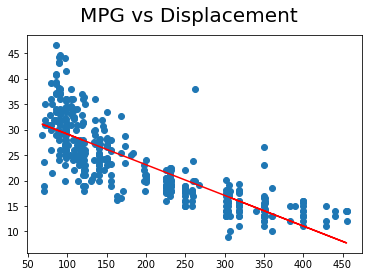

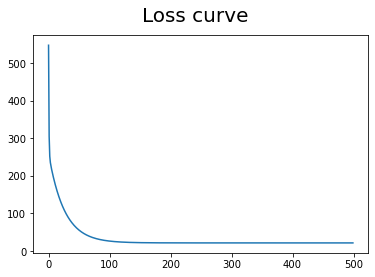

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

dfauto = pd.read_csv('C:/Users/xyz/Desktop/auto-mpg.data', delim_whitespace=True, header=0)

dfauto.head
#dfauto.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Origin','Model']

dfauto.describe()

inputs0 = dfauto['Displacement'].apply(lambda x: x/100)
targets0 = dfauto['MPG']

inputs = tf.constant( inputs0.values.reshape(398,1), shape=(398,1), dtype=tf.float64)
targets = tf.constant( targets0.values.reshape(398,1), shape=(398,1), dtype=tf.float64)


w = tf.Variable(initial_value=tf.random.uniform(shape = (1,1), dtype=tf.float64 ))
b = tf.Variable(initial_value=tf.zeros(shape=(1), dtype=tf.float64 ))

def model(inputs) :
  return tf.matmul(inputs, w) + b

def mean_sq_loss(predictions, targets) :
  sq_loss = tf.square(  targets - predictions )
  return tf.reduce_mean ( sq_loss )

learn_rate= 0.05

def training (inputs, targets) :
 with tf.GradientTape( persistent=True) as g:
    g.watch(w)
    g.watch(b)
    predictions = model( inputs)
    #print(predictions)
    loss = mean_sq_loss( predictions, targets )
 dl_dw = g.gradient(loss, w)
 dl_db = g.gradient(loss, b)

 w.assign_sub (dl_dw * learn_rate )
 b.assign_sub (dl_db * learn_rate )
 g.stop_recording
  
 return loss

loss_plot = []

iter_plot = []

print ( "starting w b", w.numpy(), b.numpy())

for step in range(500) :         
 loss = training(inputs, targets)
 #print("Loss ", loss.numpy())
 loss_plot.append(loss)
 iter_plot.append(step)
 #print ( w.numpy(), b.numpy())
 
print ( "At the end of training w and b ",w.numpy(), b.numpy())

fig1 = plt.figure(1)
pre_y = model(inputs)
plt.plot( dfauto['Displacement'], pre_y.numpy()[:,0], '-r')
plt.scatter( dfauto['Displacement'], dfauto['MPG'])
fig1.suptitle('MPG vs Displacement', fontsize=20)
fig1.show

fig2 = plt.figure(2)
plt.plot(iter_plot, loss_plot)
fig2.suptitle('Loss curve', fontsize=20)
fig2.show

